In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Importing data
dfRaw = pd.read_csv('titanic_train.csv')

<Axes: >

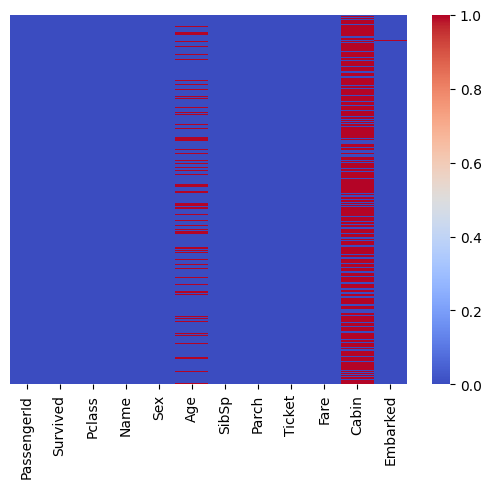

In [5]:
# Checking for null values
sns.heatmap(dfRaw.isnull(), yticklabels=False, cmap='coolwarm')

In [6]:
# Dropping Cabin column because has the majority of it's values null
dfRaw.drop('Cabin', axis=1, inplace=True)

In [7]:
dfRaw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
# Check for avg age according to each class
dfRaw.groupby(by='Pclass', as_index=False)[['Age']].mean().astype(int)

,Pclass,Age
0,1,38
1,2,29
2,3,25


In [9]:
# Creating a function to fill null values of age according to passenger's class

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return dfRaw[dfRaw['Pclass'] == 1]['Age'].mean()
        elif Pclass == 2:
            return dfRaw[dfRaw['Pclass'] == 2]['Age'].mean()
        else: 
            return dfRaw[dfRaw['Pclass'] == 3]['Age'].mean()
    else: 
        return Age

# Removing extra zeros from age column by converting it to INT

dfRaw['Age'] = dfRaw[['Age', 'Pclass']].apply(impute_age, axis=1).astype(int)

<Axes: >

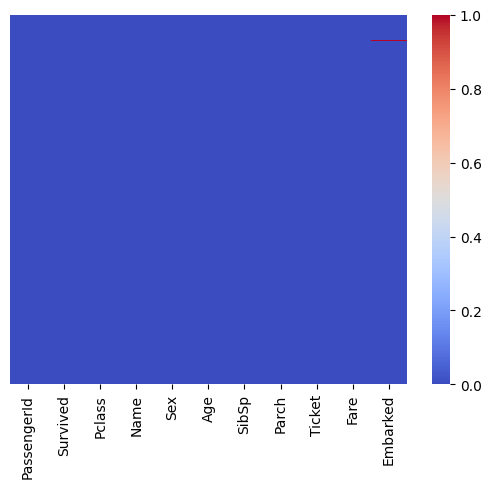

In [10]:
# Checking for any other empty values

sns.heatmap(dfRaw.isnull(), yticklabels=False, cmap="coolwarm")

In [11]:
# Checking how many people came together

dfTickets = dfRaw.groupby(by='Ticket', as_index=0)[['PassengerId']].count().copy()
dfTickets.rename({'PassengerId': 'NofPeople'}, axis=1, inplace=True)

In [12]:
# Checking how many people survived from each group

dfRaw.groupby(by='Ticket', as_index=False)[['Survived']].sum()

# Mergin both columns together

dfTickets = pd.merge(left=dfTickets, right=dfRaw.groupby(by='Ticket', as_index=False)[['Survived']].sum(), how='inner', on='Ticket')

In [13]:
dfTickets

,Ticket,NofPeople,Survived
0,110152,3,3
1,110413,3,2
2,110465,2,0
3,110564,1,1
4,110813,1,1
...,...,...,...
676,W./C. 6608,4,0
677,W./C. 6609,1,0
678,W.E.P. 5734,1,0
679,W/C 14208,1,0


In [14]:
# Adding column Fatailities to the Dataframe

dfTickets['Fatalities'] = dfTickets['NofPeople'] - dfTickets['Survived']

In [15]:
# Getting the ticket's class and merging them together

dfTickets = pd.merge(left=dfTickets, right=dfRaw[['Ticket', 'Pclass']].drop_duplicates(), how='inner', on='Ticket')
dfTickets.rename({'Pclass': 'Class'}, axis=1, inplace=True)

In [16]:
dfTickets

,Ticket,NofPeople,Survived,Fatalities,Class
0,110152,3,3,0,1
1,110413,3,2,1,1
2,110465,2,0,2,1
3,110564,1,1,0,1
4,110813,1,1,0,1
...,...,...,...,...,...
676,W./C. 6608,4,0,4,3
677,W./C. 6609,1,0,1,3
678,W.E.P. 5734,1,0,1,1
679,W/C 14208,1,0,1,2


In [17]:
dfRaw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [18]:
# Copying raw DataFrame to manipulate the results
dfClass = dfRaw.copy()

In [19]:
# Filtering the results By class and merging them together
dfClass = pd.merge(left=dfClass.groupby('Pclass', as_index=0)['PassengerId'].count(),right=dfClass.groupby('Pclass', as_index=0)['Survived'].sum(),how='inner',on='Pclass')
dfClass.rename({'PassengerId': 'TotalofPeople'},axis=1, inplace=True)
dfClass['Fatalities'] = dfClass['TotalofPeople'] - dfClass['Survived']

In [20]:
dfClass

,Pclass,TotalofPeople,Survived,Fatalities
0,1,216,136,80
1,2,184,87,97
2,3,491,119,372


In [21]:
# Adding a Fare Column and rounding it's result
dfClass= pd.merge(left=dfClass, right=dfRaw.groupby(by='Pclass', as_index=False)['Fare'].mean(), how='inner', on='Pclass')
dfClass['Fare'] = round(dfClass['Fare'], 2)

In [22]:
dfClass

,Pclass,TotalofPeople,Survived,Fatalities,Fare
0,1,216,136,80,84.15
1,2,184,87,97,20.66
2,3,491,119,372,13.68


In [23]:
# DataFrame of Stats per ticket

dfTickets

,Ticket,NofPeople,Survived,Fatalities,Class
0,110152,3,3,0,1
1,110413,3,2,1,1
2,110465,2,0,2,1
3,110564,1,1,0,1
4,110813,1,1,0,1
...,...,...,...,...,...
676,W./C. 6608,4,0,4,3
677,W./C. 6609,1,0,1,3
678,W.E.P. 5734,1,0,1,1
679,W/C 14208,1,0,1,2


In [24]:
# Tickets where there are no deaths
Everyone_Survived = dfTickets[dfTickets['Fatalities'] == 0].count()['Ticket']

In [25]:
# Tickets where there are fatalities and survivors
Has_Survivors = dfTickets[(dfTickets['Fatalities'] != dfTickets['NofPeople']) & (dfTickets['Fatalities'] > 0)].count()['Ticket']

In [26]:
# Tickets where there are no survivors
Everyone_died = dfTickets[dfTickets['Fatalities'] == dfTickets['NofPeople']].count()['Ticket']

In [27]:
dfTicketList = pd.DataFrame(data={'Everyone_Survived': [Everyone_Survived], 'Has_Survivors': [Has_Survivors], 'Everyone_died' : Everyone_died})

In [28]:
dfTicketList

,Everyone_Survived,Has_Survivors,Everyone_died
0,211,49,421


[Text(0, 0, '211'), Text(0, 0, '49'), Text(0, 0, '421')]

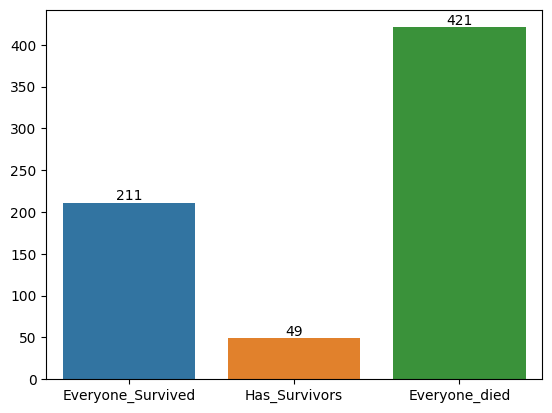

In [29]:
# Graph of the stats of the Survivors / Deaths per Ticket


barTickets = sns.barplot(data=dfTicketList)

barTickets.bar_label(barTickets.containers[0])

In [30]:
# DataFrame of Stats per Class

dfClass

,Pclass,TotalofPeople,Survived,Fatalities,Fare
0,1,216,136,80,84.15
1,2,184,87,97,20.66
2,3,491,119,372,13.68


[Text(0, 0, '80'), Text(0, 0, '97'), Text(0, 0, '372')]

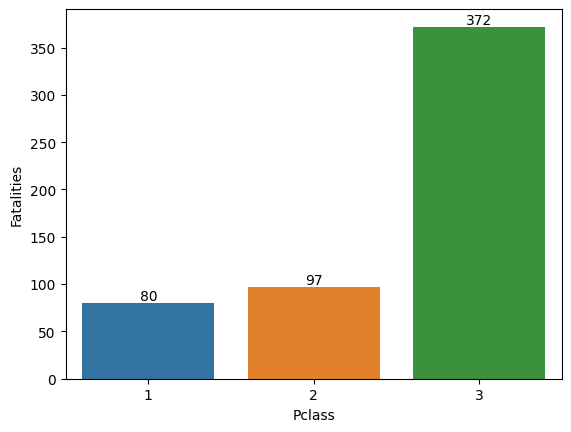

In [31]:
# Graph of the stats of the Survivors / Deaths per Class

barClass = sns.barplot(data=dfClass, y='Fatalities', x='Pclass')
barClass.bar_label(barClass.containers[0])

[Text(0.5, 0, 'Fatalities - Survivors'), Text(0, 0.5, 'Number of People')]

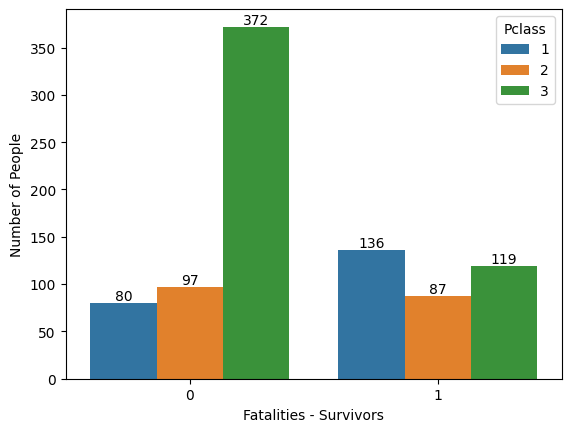

In [32]:
# Making a plot to see people from which class survived the most as 0 to Not survived and 1 to Survived
barClassSurvivors = sns.countplot(x='Survived', data=dfRaw, hue='Pclass')

for i in range(3):
    barClassSurvivors.bar_label(barClassSurvivors.containers[i])

barClassSurvivors.set(xlabel='Fatalities - Survivors', ylabel='Number of People')

In [33]:
# Creating a dataframe to list groups
dfGroups = dfTickets.copy()

In [34]:
dfGroups.drop(['Survived','Fatalities','Class'], axis=1, inplace=True)

In [35]:
dfGroups = pd.DataFrame(data = {
    'Singles': [dfGroups[dfGroups['NofPeople'] == 1].count()['Ticket']],
    'Couples': [dfGroups[dfGroups['NofPeople'] == 2].count()['Ticket']],
    'Three_or_More': [dfGroups[dfGroups['NofPeople'] >= 3].count()['Ticket']]
})

In [36]:
dfGroups

,Singles,Couples,Three_or_More
0,547,94,40


[Text(0, 0, '547'), Text(0, 0, '94'), Text(0, 0, '40')]

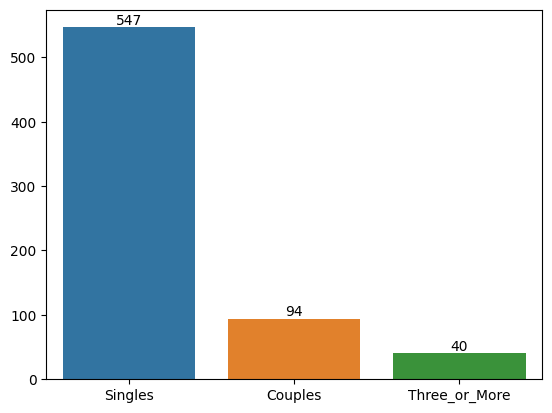

In [37]:
# Graph of the stats of Groups
barGroups = sns.barplot(data=dfGroups)

barGroups.bar_label(barGroups.containers[0])

In [38]:
# Creating a Dataframe to gather some data about the doctors on the ship

dfProfessions = dfRaw[dfRaw['Name'].str.contains(', Dr.')][['Survived', 'Name', 'Pclass', 'Fare']]
dfProfessions['Fare'] = dfProfessions['Fare'].round(2)
dfProfessions

,Survived,Name,Pclass,Fare
245,0,"Minahan, Dr. William Edward",1,90.00
317,0,"Moraweck, Dr. Ernest",2,14.00
398,0,"Pain, Dr. Alfred",2,10.50
632,1,"Stahelin-Maeglin, Dr. Max",1,30.50
660,1,"Frauenthal, Dr. Henry William",1,133.65
766,0,"Brewe, Dr. Arthur Jackson",1,39.60
796,1,"Leader, Dr. Alice (Farnham)",1,25.93


In [39]:
dfProfessions[dfProfessions['Survived'] == 1].count()

Survived    3
Name        3
Pclass      3
Fare        3
dtype: int64

In [40]:
dfProfessions[dfProfessions['Survived'] == 1].groupby(by='Pclass', as_index=0).count()[['Pclass', 'Survived']]

,Pclass,Survived
0,1,3


In [41]:
dfSex = dfRaw.copy().groupby(by='Sex', as_index=False)[['PassengerId']].count()
dfSex.rename({'PassengerId': 'NumOfPeople'}, axis=1, inplace=True)
dfSex = pd.merge(left=dfSex, right=dfRaw.groupby(by='Sex', as_index=False)['Survived'].sum(), how='inner', on='Sex')
dfSex['Deaths'] = dfSex['NumOfPeople'] - dfSex['Survived']

In [42]:
dfSex = dfSex.sort_values(by='NumOfPeople', ascending=False)

In [43]:
dfSex

,Sex,NumOfPeople,Survived,Deaths
1,male,577,109,468
0,female,314,233,81


[Text(0, 0, '109'), Text(0, 0, '233')]

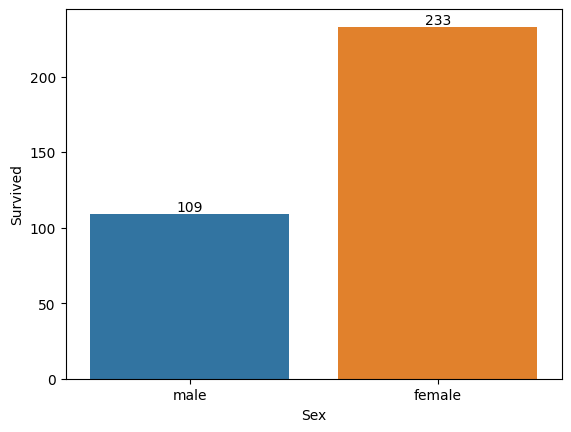

In [44]:
barSex = sns.barplot(data=dfSex, x='Sex', y='Survived')
barSex.bar_label(barSex.containers[0])

[Text(0, 0, '468'), Text(0, 0, '81')]

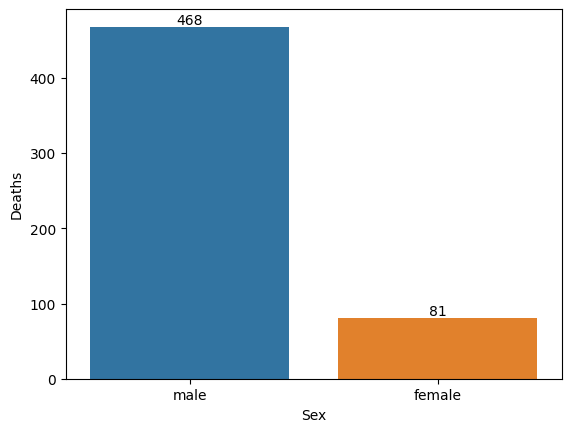

In [45]:
barSex = sns.barplot(data=dfSex, x='Sex', y='Deaths')
barSex.bar_label(barSex.containers[0])

# Classes: 3

1ª Class:	134 survivors and 80 deaths <br>
2ª Class:	87 survivors and 97 deaths <br>
3ª Class:	119 survivors and 372 deaths <br>

# Groups

<b>681</b> tickets Sold in total <br>
which <b>40</b> tickets were for three or more people, <br>
which <b>94</b> tickets were for two people, <br>
and <b>547</b> for singles.

The tickets who had more deaths were <b>347082</b> and <b>CA. 2343</b> with a total of <b>7</b> deaths and that represents <b>2,55%</b> from the total of deaths <br>

In total <b>421</b> tickets had <b>100%</b> of fatalities, that represents <b>494</b> people which is <b>55%</b> of the total of people<br>
In total <b>49</b> tickets had survivors, that represents <b>127</b> people which is <b>14,25%</b> of the total of people<br>
In total <b>211</b> tickets had <b>0%</b> deaths, that represents <b>270</b> people which is <b>30,30%</b> of the people<br>

# Ages

The average age were: <br>

1º Class: <b>38</b> years old, with a total of <b>216</b> people and an average fare of: <b>$84</b><br>
2º Class: <b>29</b> years old, with a total of <b>184</b> people and an average fare of: <b>$20</b><br>
3º Class: <b>25</b> years old, with a total of <b>491</b> people and an average fare of: <b>$13</b><br>

# Doctors

They were: <b>7</b> Doctors which only <b>3</b> survived <br>
There were <b>5</b> in 1º class and <b>2</b> in 2º class <br>

All of the doctors that survived were from the first class, <br>
they paid in average <b>$49</b> per ticket with <b>$133.65</b> being the maximum and <b>$10.5</b> the lowest. 

# Sex

They were <b>577</b> male passengers which only <b>109</b> survived, which represents <b>14,75%</b> from the total deaths <br>
They were <b>314</b> female passengers which only <b>233</b> survived, which represents <b>85,24%</b> from the total deaths

# Machine Learning Prediction

In [46]:
sex = pd.get_dummies(dfRaw['Sex'],drop_first=True)
embark = pd.get_dummies(dfRaw['Embarked'],drop_first=True)

In [47]:
dfRaw.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [48]:
dfRaw = pd.concat([dfRaw,sex,embark],axis=1)

In [49]:
dfRaw.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1


In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(dfRaw.drop('Survived',axis=1), 
                                                    dfRaw['Survived'], test_size=0.40, random_state=None)

In [52]:
from sklearn.linear_model import LogisticRegression

In [70]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [71]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       208
           1       0.81      0.76      0.78       149

    accuracy                           0.82       357
   macro avg       0.82      0.81      0.82       357
weighted avg       0.82      0.82      0.82       357

